<a href="https://colab.research.google.com/github/load-aako/data-vis/blob/main/song_popularity_deep_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [88]:
spotifytracks = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

Using Colab cache for faster access to the '-spotify-tracks-dataset' dataset.


In [89]:
print(os.listdir(spotifytracks))


['dataset.csv']


In [90]:
df_spotifytracks = pd.read_csv(os.path.join(spotifytracks, 'dataset.csv'))
display(df_spotifytracks.head())

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


track_id: The Spotify ID for the track


artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

album_name: The album name in which the track appears

track_name: Name of the track

popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

duration_ms: The track length in milliseconds

explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

loudness: The overall loudness of a track in decibels (dB)

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

track_genre: The genre in which the track belongs



In [91]:
everynoiseatonce = kagglehub.dataset_download("nikitricky/every-noise-at-once")

Using Colab cache for faster access to the 'every-noise-at-once' dataset.


In [92]:
print(os.listdir(everynoiseatonce))


['songs.csv']


In [93]:
df_everynoiseatonce = pd.read_csv(os.path.join(everynoiseatonce, 'songs.csv'), encoding='latin1')
display(df_everynoiseatonce.head())

,Name,Id,Artists,Artists_Id,Release,Duration,Genre,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valeance,Tempo
0,Don't Go Yet,1058fW9H3fZA6QjYCdOBad,['Camila Cabello'],['4nDoRrQiYLoBzwC5BhVJzF'],2021-07-23,164842,pop,0.666,0.796,10,-6.967,0.1030,0.0492,0.000000,0.0442,0.6100,110.108
1,What A Time (feat. Niall Horan),5WtfUKzXircvW8l5aaVZWT,"['Julia Michaels', 'Niall Horan']","['0ZED1XzwlLHW4ZaG4lOT6m', '1Hsdzj7Dlq2I7tHP75...",2019-01-24,173307,pop,0.516,0.467,0,-6.184,0.0302,0.6620,0.000000,0.0853,0.3860,132.861
2,Scars To Your Beautiful,42ydLwx4i5V49RXHOozJZq,['Alessia Cara'],['2wUjUUtkb5lvLKcGKsKqsR'],2016-03-11,230227,pop,0.319,0.739,0,-5.740,0.2720,0.0285,0.000000,0.1110,0.4490,194.169
3,Reckless,5ajjAnNRh8bxFvaVHzpPjh,['Madison Beer'],['2kRfqPViCqYdSGhYSM9R0Q'],2021-06-04,203385,pop,0.386,0.426,3,-6.642,0.0363,0.8070,0.000000,0.1400,0.2610,180.104
4,Dusk Till Dawn (feat. Sia) - Radio Edit,3e7sxremeOE3wTySiOhGiP,"['ZAYN', 'Sia']","['5ZsFI1h6hIdQRw2ti0hz81', '5WUlDfRSoLAfcVSX1W...",2018-12-14,239000,pop,0.259,0.437,11,-6.589,0.0386,0.1020,0.000001,0.1060,0.0951,180.042


it appears that either dataset contains duplicates of track_id




In [94]:
df_spotifytracks['track_id'].value_counts().head()


,count
track_id,
6S3JlDAGk3uu3NtZbPnuhS,9
2Ey6v4Sekh3Z0RUSISRosD,8
2kkvB3RNRzwjFdGhaUA0tz,8
4WJTKbNJQ41zXnb84jSWaj,7
2aaClnypAakdAmLw74JXxB,7


df_spotifytracks has duplicates for no apparent reason, only the row number is different. so these duplicates can probably be removed

In [95]:
df_spotifytracks = df_spotifytracks.drop_duplicates(subset=['track_id'])


In [96]:
df_spotifytracks['track_id'].value_counts().head()


,count
track_id,
2hETkH7cOfqmz3LqZDHZf5,1
5SuOikwiRyPMVoIQDJUgSV,1
4qPNDBW1i3p13qLCt0Ki3A,1
1iJBSr7s7jYXzM8EGcbK5b,1
6lfxq3CG4xtTiEg7opyCyx,1


In [97]:
df_everynoiseatonce['Id'].value_counts().head()


,count
Id,
5YfTPW6DEdcLJEFdYXNxoS,15
4wSMi5urWxpBPbnWqfI1Ht,15
3lgmNuyHtfDSJdJ87TANkT,13
1zcV54IyIHMrIDhTytt3b2,13
4JT4orneDAvaWkjUTuwShZ,13


every noise at once dataset contains multiple rows for each genre that applies to the same song!

In [98]:
df_everynoiseatonce = df_everynoiseatonce.drop_duplicates()


In [99]:
df_everynoiseatonce['Id'].value_counts()

,count
Id,
5YfTPW6DEdcLJEFdYXNxoS,15
4wSMi5urWxpBPbnWqfI1Ht,15
3lgmNuyHtfDSJdJ87TANkT,13
1zcV54IyIHMrIDhTytt3b2,13
4JT4orneDAvaWkjUTuwShZ,13
...,...
04TmYMZON2CQwVu6lpDOMO,1
3g2yGHf9wLGRc2BtSzqzhw,1
31Flu4iAEnRbYagMWRdrgt,1


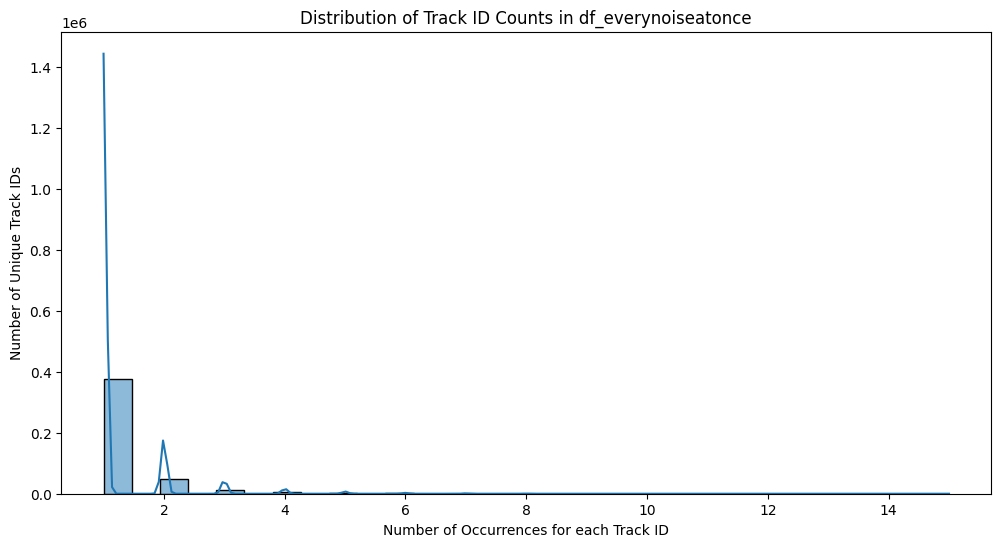

In [100]:
id_counts = df_everynoiseatonce['Id'].value_counts()

# Plot the distribution of Id counts
plt.figure(figsize=(12, 6))
sns.histplot(id_counts, bins=30, kde=True)
plt.title('Distribution of Track ID Counts in df_everynoiseatonce')
plt.xlabel('Number of Occurrences for each Track ID')
plt.ylabel('Number of Unique Track IDs')
plt.show()

This histogram shows the distribution of how many times each `Id` appears in the `df_everynoiseatonce` dataset. A high peak at the lower end indicates that most IDs appear only a few times. Most tracks only have one genre, so instead of widening the dataset we can remove the duplicates for the few tracks that have them.

Since the classification into any single 'genre' is quite subjective, we remove the duplicates at random rather than trying to determine the most accurate genre classification.

In [101]:
df_everynoiseatonce = df_everynoiseatonce.drop_duplicates(subset=['Id'])
df_everynoiseatonce['Id'].value_counts()


,count
Id,
6RvJctszO0WQN1DmvWhfWK,1
1058fW9H3fZA6QjYCdOBad,1
5WtfUKzXircvW8l5aaVZWT,1
42ydLwx4i5V49RXHOozJZq,1
5ajjAnNRh8bxFvaVHzpPjh,1
...,...
3zHq9ouUJQFQRf3cm1rRLu,1
6FZDfxM3a3UCqtzo5pxSLZ,1
5Gu0PDLN4YJeW75PpBSg9p,1


(I merged the entire dataset and checked that the duplicate columns correlated and they all gave .9999 correlations, so they are indeed the same)

So we only want to add album name, popularity, explicit, mode, time_signature, and track_genre


In [102]:
df = pd.merge(df_everynoiseatonce,df_spotifytracks[['track_id', 'album_name', 'popularity', 'explicit', 'mode', 'time_signature', 'track_genre']],left_on="Id", right_on="track_id")

df.columns

Index(['Name', 'Id', 'Artists', 'Artists_Id', 'Release', 'Duration', 'Genre',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valeance', 'Tempo',
       'track_id', 'album_name', 'popularity', 'explicit', 'mode',
       'time_signature', 'track_genre'],
      dtype='object')

we want to add labels for training the data to detect 'popularity'

we use 70 out of 100 arbitrarily as the threshold

In [103]:
df['Popular'] = df['popularity'] > 70

df

,Name,Id,Artists,Artists_Id,Release,Duration,Genre,Danceability,Energy,Key,...,Valeance,Tempo,track_id,album_name,popularity,explicit,mode,time_signature,track_genre,Popular
0,What A Time (feat. Niall Horan),5WtfUKzXircvW8l5aaVZWT,"['Julia Michaels', 'Niall Horan']","['0ZED1XzwlLHW4ZaG4lOT6m', '1Hsdzj7Dlq2I7tHP75...",2019-01-24,173307,pop,0.516,0.4670,0,...,0.3860,132.861,5WtfUKzXircvW8l5aaVZWT,Inner Monologue Part 1,82,False,1,4,dance,True
1,Scars To Your Beautiful,42ydLwx4i5V49RXHOozJZq,['Alessia Cara'],['2wUjUUtkb5lvLKcGKsKqsR'],2016-03-11,230227,pop,0.319,0.7390,0,...,0.4490,194.169,42ydLwx4i5V49RXHOozJZq,Know-It-All (Deluxe),74,False,1,4,dance,True
2,Reckless,5ajjAnNRh8bxFvaVHzpPjh,['Madison Beer'],['2kRfqPViCqYdSGhYSM9R0Q'],2021-06-04,203385,pop,0.386,0.4260,3,...,0.2610,180.104,5ajjAnNRh8bxFvaVHzpPjh,Reckless,80,False,1,3,electro,True
3,Dusk Till Dawn (feat. Sia) - Radio Edit,3e7sxremeOE3wTySiOhGiP,"['ZAYN', 'Sia']","['5ZsFI1h6hIdQRw2ti0hz81', '5WUlDfRSoLAfcVSX1W...",2018-12-14,239000,pop,0.259,0.4370,11,...,0.0951,180.042,3e7sxremeOE3wTySiOhGiP,Icarus Falls,79,False,0,4,pop,True
4,Baila Conmigo (with Rauw Alejandro),079Ey5uxL04AKPQgVQwx5h,"['Selena Gomez', 'Rauw Alejandro']","['0C8ZW7ezQVs4URX5aX7Kqx', '1mcTU81TzQhprhouKa...",2021-03-12,186088,pop,0.823,0.5440,5,...,0.6640,149.903,079Ey5uxL04AKPQgVQwx5h,Revelación - EP,75,False,1,4,dance,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,Infernal Disease,5T560XyS4xD5vPrsc5QGcs,['Integral Rigor'],['2F43bvO7qOQMx4UGg1YYd6'],2020-12-02,284003,vietnamese traditional,0.541,0.9500,1,...,0.2200,114.006,5T560XyS4xD5vPrsc5QGcs,Infernal Disease,0,True,0,4,iranian,False
7215,Nine,3incV1wkxVqdwMS7dji4ko,['Farzad Golpayegani'],['6BDEfxWlzHxp6eQDtXrx10'],2005-05-01,463000,vietnamese traditional,0.292,0.8390,2,...,0.1230,103.464,3incV1wkxVqdwMS7dji4ko,Two,0,False,1,3,iranian,False
7216,"Il Trovatore / Act 2: ""Vedi! le fosche notturn...",3DMVcsRpSRRQ6uXLofjDmS,"['Giuseppe Verdi', 'Chorus of the Royal Opera ...","['1JOQXgYdQV2yfrhewqx96o', '06MDD2tGLJbN2URk3W...",1981-01-01,153333,faroese jazz,0.424,0.1450,7,...,0.5110,146.983,3DMVcsRpSRRQ6uXLofjDmS,Verdi: Il Trovatore (Highlights),20,False,1,4,opera,False
7217,"Turandot / Act 2: ""Gravi, enormi ed impotenti""",1reLj9gizcW2Igb1SmaXAl,"['Giacomo Puccini', 'John Alldis Choir', 'Lond...","['0OzxPXyowUEQ532c9AmHUR', '1c0LUqvKTiWVsdrIn4...",1973-09-01,207160,faroese jazz,0.212,0.3210,8,...,0.1310,61.551,1reLj9gizcW2Igb1SmaXAl,Puccini: Turandot,22,False,1,4,opera,False


In [104]:
df.dtypes


,0
Name,object
Id,object
Artists,object
Artists_Id,object
Release,object
Duration,int64
Genre,object
Danceability,float64
Energy,float64
Key,int64


In [108]:
# Drop ID-like and string columns
X = df.drop(columns=['Id', 'track_id', 'Artists_Id', 'Name', 'Artists', 'Release', 'album_name'])

# Convert booleans to integers
X['explicit'] = X['explicit'].astype(int)

# Categorical encoding
X = pd.get_dummies(X, columns=['Genre', 'track_genre', 'mode', 'time_signature'])

# Ensure all numerics and booleans are float32 for Keras
for col in X.select_dtypes(include=['float64', 'int64', 'bool']).columns:
    X[col] = X[col].astype('float32')

# Separate target variable y
y = X['Popular'].astype('float32') # Ensure y is also float32

# Drop 'Popular' from X as it's the target
X = X.drop(columns=['Popular'])

print(f"Number of features in X: {X.shape[1]}")
X

Number of features in X: 1728


,Duration,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valeance,...,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,173307.0,0.516,0.4670,0.0,-6.184000,0.0302,0.662000,0.000000,0.0853,0.3860,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,230227.0,0.319,0.7390,0.0,-5.740000,0.2720,0.028500,0.000000,0.1110,0.4490,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,203385.0,0.386,0.4260,3.0,-6.642000,0.0363,0.807000,0.000000,0.1400,0.2610,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,239000.0,0.259,0.4370,11.0,-6.589000,0.0386,0.102000,0.000001,0.1060,0.0951,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,186088.0,0.823,0.5440,5.0,-7.132000,0.0715,0.021500,0.003150,0.0966,0.6640,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,284003.0,0.541,0.9500,1.0,-5.522000,0.0992,0.000058,0.723000,0.0884,0.2200,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7215,463000.0,0.292,0.8390,2.0,-5.341000,0.0434,0.158000,0.826000,0.1910,0.1230,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7216,153333.0,0.424,0.1450,7.0,-21.004999,0.0499,0.938000,0.002800,0.8090,0.5110,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7217,207160.0,0.212,0.3210,8.0,-10.990000,0.0332,0.887000,0.740000,0.1330,0.1310,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


building a neural network

In [110]:
# stratify - make sure classes are evenly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

In [111]:
input_shape=[X.shape[1]]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation= 'sigmoid'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [112]:
model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)


Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - binary_accuracy: 0.5263 - loss: 0.8838 - val_binary_accuracy: 0.3856 - val_loss: 0.7283
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - binary_accuracy: 0.6716 - loss: 0.6351 - val_binary_accuracy: 0.4970 - val_loss: 0.6853
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - binary_accuracy: 0.7371 - loss: 0.5431 - val_binary_accuracy: 0.7307 - val_loss: 0.6080
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - binary_accuracy: 0.8036 - loss: 0.4568 - val_binary_accuracy: 0.8460 - val_loss: 0.5540
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - binary_accuracy: 0.8579 - loss: 0.3848 - val_binary_accuracy: 0.9064 - val_loss: 0.4970
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - binary_accuracy: 0.8927 - loss: 0.3365 - val_binary_accuracy: 0.9380 - val_loss: 0.4373
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - binary_accuracy: 0.9142 - loss: 0.2837 - val_binary_accuracy: 0.9712 - val_loss: 0.3618
Epoch 

<Axes: title={'center': 'Accuracy'}>

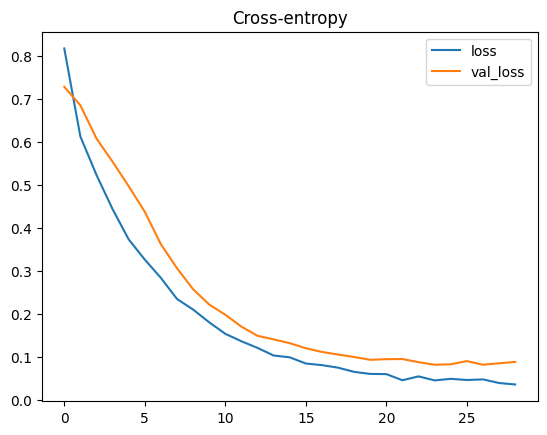

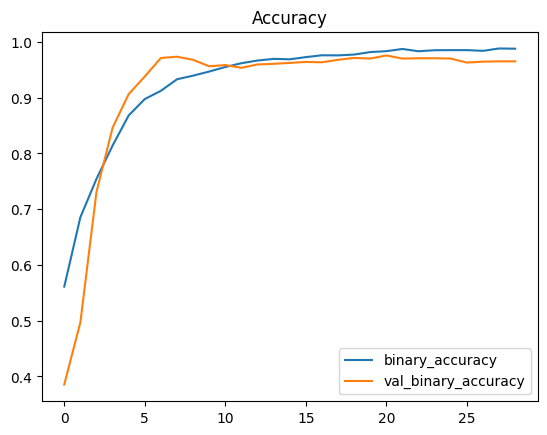

In [113]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")